In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
student_data = pd.read_csv("/content/xAPI-Edu-Data.csv")

In [3]:
student_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

Checking count of students in different levels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


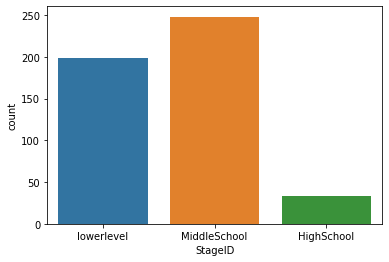

In [5]:
sns.countplot(student_data['StageID'])

Checking count of male and female in different levels

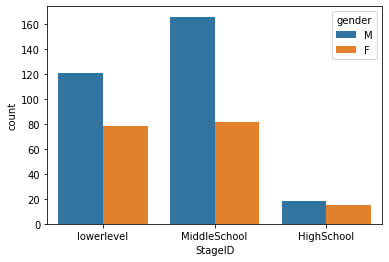

In [63]:
sns.countplot(x='StageID',hue='gender',data=student_data)

Count of students studying the course in each of the country

In [19]:
df = pd.crosstab(student_data['NationalITy'],student_data['Topic'],margins=True).style.background_gradient(cmap='summer_r')
df

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish,All
NationalITy,,,,,,,,,,,,,
Egypt,0,0,0,1,2,0,0,1,1,1,3,0,9
Iran,0,0,0,0,2,0,0,2,0,0,0,2,6
Iraq,6,4,2,2,2,2,2,0,0,0,2,0,22
Jordan,21,16,22,17,33,20,8,4,0,5,24,2,172
KW,20,0,0,15,5,0,7,82,15,8,13,14,179
Lybia,0,2,0,0,4,0,0,0,0,0,0,0,6
Morocco,3,0,0,0,1,0,0,0,0,0,0,0,4
Palestine,4,6,0,6,4,2,2,0,0,0,4,0,28
SaudiArabia,1,0,0,1,1,0,0,2,1,1,3,1,11


Checking the satisfaction rate of parents in different countries

In [45]:
df1 = pd.crosstab(student_data['NationalITy'],student_data['ParentschoolSatisfaction'],margins=True).style.background_gradient(cmap='summer_r')
df1

ParentschoolSatisfaction,Bad,Good,All
NationalITy,,,
Egypt,2,7,9
Iran,3,3,6
Iraq,0,22,22
Jordan,66,106,172
KW,90,89,179
Lybia,0,6,6
Morocco,3,1,4
Palestine,0,28,28
SaudiArabia,7,4,11


Checking the no of days students remain absent

In [34]:
df2 = pd.crosstab(student_data['gender'],student_data['StudentAbsenceDays'])
df2

StudentAbsenceDays,Above-7,Under-7
gender,,
F,46,129
M,145,160


In [35]:
Observed_values = df2.values

Calculating the expected values

In [39]:
val = stats.chi2_contingency(df2)
val

(20.091356744447694,
 7.3829576975348704e-06,
 1,
 array([[ 69.63541667, 105.36458333],
        [121.36458333, 183.63541667]]))

In [40]:
Expected_values = val[3]

Calculating degree of freedom

In [41]:
alpha_value = 0.05
degree_of_freedom = (len(df2.index)-1)*(len(df2.columns)-1)
print("Degree of Freedom :",degree_of_freedom)
print("Alpha Value :",alpha_value)

Degree of Freedom : 1
Alpha Value : 0.05


Calculating Chi Square value

In [42]:
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_values,Expected_values)])
chi_square_statistic = chi_square[0] + chi_square[1]
print("Chi Square Statistic :",chi_square_statistic)

Chi Square Statistic : 20.96916513226384


Calculating degree of freedom

In [43]:
p_value = 1-stats.chi2.cdf(x=chi_square_statistic,df=degree_of_freedom)
print("P value :",p_value)

P value : 4.6673519402684605e-06


In [44]:
if p_value <= alpha_value:
  print("The count of Male and Female students is different")
else:
  print("The count of Male and Female students is same")

The count of Male and Female students is different


Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.

In [46]:
df3 = pd.crosstab(student_data['NationalITy'],student_data['StageID'],margins=True).style.background_gradient(cmap='summer_r')
df3

StageID,HighSchool,MiddleSchool,lowerlevel,All
NationalITy,,,,
Egypt,0,5,4,9
Iran,1,2,3,6
Iraq,0,12,10,22
Jordan,0,96,76,172
KW,21,84,74,179
Lybia,0,2,4,6
Morocco,0,3,1,4
Palestine,0,16,12,28
SaudiArabia,6,2,3,11


Count of students visiting the course content among the three levels

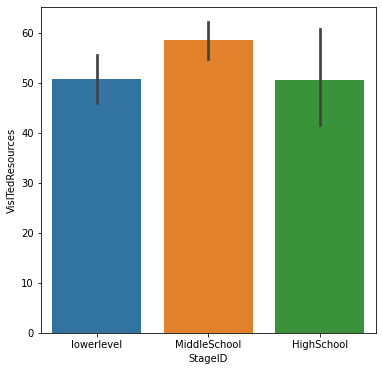

In [59]:
plt.figure(figsize=(6,6))
sns.barplot(x=student_data['StageID'],y=student_data['VisITedResources'])
plt.show()

Count of Students active in Discussion Groups

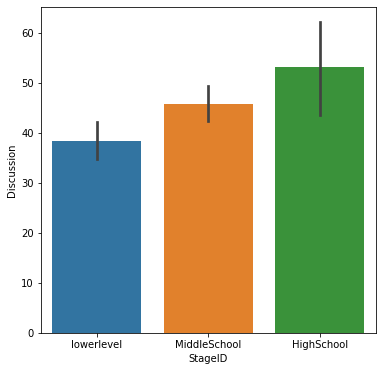

In [60]:
plt.figure(figsize=(6,6))
sns.barplot(x=student_data['StageID'],y=student_data['Discussion'])
plt.show()